In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm,skew
import numpy as np
import json
import seaborn as sns
import re
from copy import deepcopy
from scipy.special import boxcox1p

In [2]:
import pandas as pd
from scipy.stats import norm,skew
import numpy as np
import json
import seaborn as sns
import re
from copy import deepcopy
from scipy.special import boxcox1p
import math
age_dict_10 = {'sixty':60, 'eighty':80 ,'fifty':50, 'forty':40, 'twenty':20 ,'ninety':90,'thirty':30,'seventy':70}
age_dict_1 = {'one':1,'two':2,'three':3,'four':4,'five':5,'fivee':5,'six':6,'seven':7,'eight':8,'nine':9}
age_dict_ = {'thirteen':13,'fourteen':14,'fifteen':15,'sixteen':16,'seventeen':17,'eighteen':18,'nineteen':19,'eleven':11,'twelve':12}
sex_list = ['m','M','MALE','f','F','FEMALE','other']
def job_living(job_status_living):
    def string_deal(string_a):
        a_st = string_a.lower()
        if a_st == 'null' or a_st == 'n.a' or a_st == '' or a_st == 'nan':
            return ''
        if a_st in {'government', 'govt.'}:
            return 'government'
        if a_st in {'business owner', 'business_owner', 'biz'}:
            return 'business owner'
        if a_st in {'private', 'private sector', 'private_sector', 'privattte'}:
            return 'private sector'
        if a_st in {'parental_leave', 'parental leave'}:
            return 'parental leave'
        if a_st in {'city', 'c'}:
            return 'city'
        if a_st in {'remote', 'remotee'}:
            return 'remote'
        if a_st in {'unemployed'}:
            return 'unemployed'
        return ''
    all_types = set()
    for i in job_status_living.values:
        if isinstance(i, str):
            split_i = i.split('?')
            for k in split_i:
                all_types.add(k)
        else:
            all_types.add('nan')
    job_status = {'government', 'business owner', 'parental leave', 'private sector', 'unemployed'}
    living = {'remote', 'city'}
    JS = []
    LV = []
    for i in job_status_living.values:
        if isinstance(i, str):
            split_i = i.split('?')[:2]
            single_JS = ''
            single_LV = ''
            for k in split_i:
                k_deal = string_deal(k)
                if k_deal in job_status:
                    single_JS += k_deal
                elif k_deal in living:
                    single_LV += k_deal
            JS.append(single_JS)
            LV.append(single_LV)
        else:
            JS.append('')
            LV.append('')
    JS_LV = pd.DataFrame({'job_status': JS, 'living': LV})
    JS_LV['job_status'] = JS_LV['job_status'].replace('', np.nan)
    JS_LV['living'] = JS_LV['living'].replace('', np.nan)
    return JS_LV


def process_age(x):
    pat = re.compile(r'[ -]')
    if type(x) == str:
        if not x:
            return np.nan
        x = x.strip()
        row = x.split(',')
        if not row[1] and not row[0]:
            return np.nan
        if not row[0] or not row[1]:
            if not row[1]:
                if row[0][0].isnumeric():
                    if '.' not in row[0]:
                        return int(row[0])
                    else:
                        return float(row[0])
                elif row[0] in sex_list:
                    return np.nan
                else:
                    for dic in [age_dict_, age_dict_1, age_dict_10]:
                        if row[0] in dic.keys():
                            return dic[row[0]]
                    return np.nan
            if not row[0]:
                if row[1][0].isnumeric():
                    if '.' not in row[1]:
                        return int(row[1])
                    else:
                        return float(row[1])
                elif row[1] in sex_list:
                    return np.nan
                else:
                    for dic in [age_dict_, age_dict_1, age_dict_10]:
                        if row[1] in dic.keys():
                            return dic[row[1]]
                    return np.nan
        sex, age = row[0], row[1].strip()
        if row[0][0].isnumeric() or (age in sex_list):
            sex, age = age, sex
        if age[0].isnumeric():
            if '.' not in age:
                return int(age)
            else:
                return float(age)
        age = re.split(pat, age)
        if len(age) == 1:
            for dic in [age_dict_, age_dict_1, age_dict_10]:
                if age[0] in dic.keys():
                    return dic[age[0]]
        else:
            return age_dict_10[age[0]] + age_dict_1[age[1]]
    else:
        return np.nan

def process_sex(x):
    if type(x) == str:
        if not x:
            return np.nan
        x = x.strip()
        row = x.split(',')
        if not row[1] and not row[0]:
            return np.nan
        if not row[0] or not row[1]:
            if not row[1]:
                if row[0] not in sex_list:
                    return np.nan
            else:
                if row[1] not in sex_list:
                    return np.nan
        sex, age = row[0], row[1].strip()
        if sex[0].isnumeric() or (age in sex_list):
            sex, age = age, sex
        if sex in ['m', 'M', 'MALE']:
            return 1
        elif sex in ['F', 'FEMALE', 'f']:
            return 0
        else:
            return 2
    else:
        return np.nan

def process_BP(x):
    if type(x)==str:
        x = x.strip()
        if x=='0':
            return 0
        elif x=='1':
            return 1
        else:
            return np.nan
    if type(x)==float:
        if not math.isnan(x):
            return int(x)
        return np.nan
    return np.nan
    

def process_heart_condition(x):
    if type(x)==str:
        if x=='1':
            return 1
        elif x=='0':
            return 0
        else:
            return np.nan
    if type(x)==int:
        return x
    if type(x)==float:
        if not math.isnan(x):
            return int(x)
    return x

def process_married(x):
    if type(x)==str:
        s = str(x)
        if s.startswith('0'):
            return 0
        elif s.startswith('1'):
            return 1
        else:
            return np.nan
    elif type(x)==int:
        return x
    elif type(x)==float:
        if not math.isnan(x):
            return int(x)
    return x

def help_replace(x):
    if type(x)==str:
        if x=='0':
            return 0
        elif x=='1':
            return 1
        else:
            return 2
    return x

def process_job(x):
    if type(x)==str:
        dic = {'private sector':0,'business owner':1,'parental leave':2,'government':3,'unemployed':4}
        return dic[x]
    else:
        return x

def process_target(x):
    if type(x) == float or type(x) == int:
        if all(s in '10.'for s in str(x)):
            if x in ['1.0','1','0.0','0']:
                return int(x)
            else:
                return np.nan
        else:
            return np.nan
    elif type(x) == str:
        if all(s in '01.'for s in x):
            if x in ['1.0','1','0.0','0']:
                return int(x)
            else:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan

def process_living(x):
    dic = {'city':0,'remote':1}
    if type(x)==str:
        return dic[x]
    return x

def process_AB(x):
    if type(x) == float:
        return x
    elif type(x) == str:
        if all(s in '0123456789.'for s in x):
            return float(x) if len(x) != 1 else np.nan
        else:
            return np.nan
    else:
        return np.nan

def process_smoker(x):
    dic = {'non-smoker':0,'quit':1,'quit?':1,'active_smoker':2}
    if type(x)==str:
        if x in dic.keys():
            return dic[x]
        else:
            return np.nan
    else:
        return x


In [3]:
data_train = pd.read_csv('train.csv',encoding='ISO-8859-1')
data_train_len = len(data_train)
target_train = data_train['stroke_in_2018']
data_train_drop = data_train.drop(['stroke_in_2018'],axis=1)
data_test = pd.read_csv('test.csv',encoding='ISO-8859-1')
data_test_len = len(data_test)
# concat train and test to deal with totally
data_total = pd.concat((data_train_drop,data_test)).reset_index(drop=True)

#deal with job_status and living area

job_status_living = data_total['job_status and living_area']
JS_LV = job_living(job_status_living)

data_total.insert(5,'job_status',JS_LV['job_status'])
data_total.insert(6,'living',JS_LV['living'])

del data_total['job_status and living_area']


data_total.insert(1,'sex',data_total['sex and age'].apply(process_sex))
data_total.insert(2,'age',data_total['sex and age'].apply(process_age))

del data_total['sex and age']


#BP
data_total['high_BP'] = data_total['high_BP'].apply(process_BP)
#heart
data_total['heart_condition_detected_2017'] = data_total['heart_condition_detected_2017'].apply(process_heart_condition)
#married
data_total['married'] = data_total['married'].apply(process_married)
#treatment
for i in ['TreatmentA','TreatmentB','TreatmentC','TreatmentD']:
    data_total[i] = data_total[i].fillna(2)
data_total['TreatmentD'] = data_total['TreatmentD'].apply(help_replace)
# job_status
data_total['job_status'] = data_total['job_status'].apply(process_job)

#living
data_total['living'] = data_total['living'].apply(process_living)

#smoker
data_total['smoker_status'] = data_total['smoker_status'].apply(process_smoker)

# average_blood_sugar
data_total['average_blood_sugar'] = data_total['average_blood_sugar'].apply(process_AB)
# BMI
data_total.to_csv('data_total.csv',index=False)
data_total['BMI'] = data_total['BMI'].apply(process_AB)


data_new_target = data_train['stroke_in_2018'].apply(process_target)

In [4]:
print(len(data_total))

43590


In [5]:
data_train = data_total[:data_train_len]
data_test = data_total[data_train_len:]
print(len(data_train))
print(len(data_test))


34872
8718


In [6]:
data_train['stroke_in_2018'] = data_new_target

/Library/Python/anaconda3/envs/MRC_QA/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
len(data_new_target)

34872

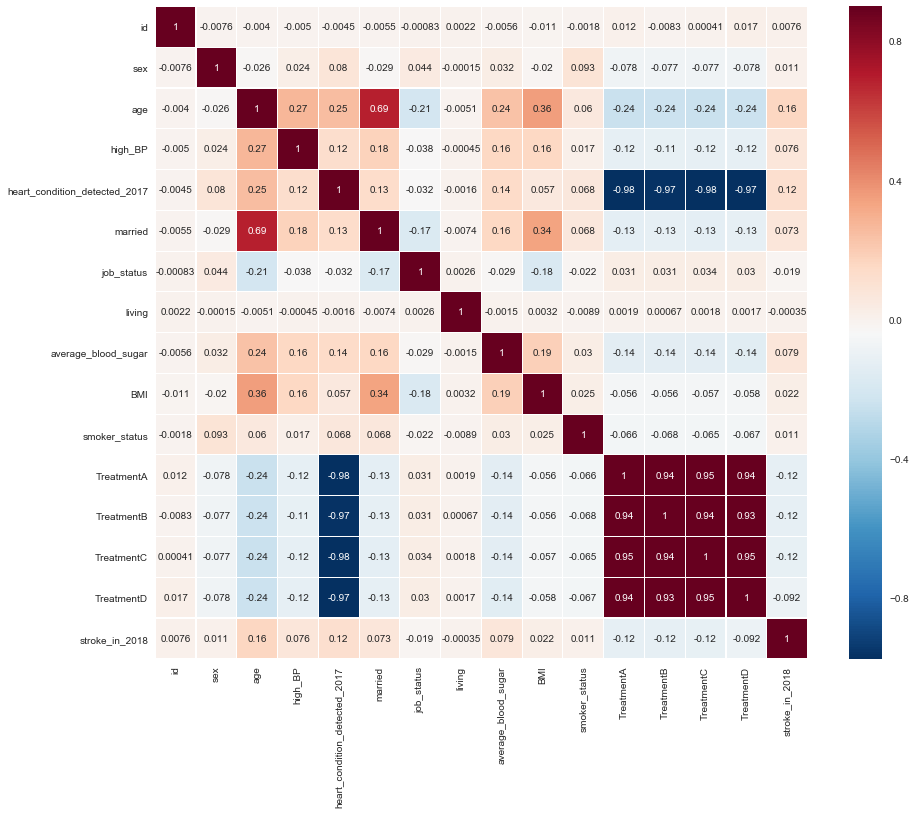

In [8]:
plt.subplots(figsize = (15,12))
sns.heatmap(data_train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)

In [9]:
for key in data_total.keys():
    print('{}:{}'.format(key,data_total[key].dtype))

id:int64
sex:float64
age:float64
high_BP:float64
heart_condition_detected_2017:float64
married:float64
job_status:float64
living:float64
average_blood_sugar:float64
BMI:float64
smoker_status:float64
TreatmentA:float64
TreatmentB:float64
TreatmentC:float64
TreatmentD:float64


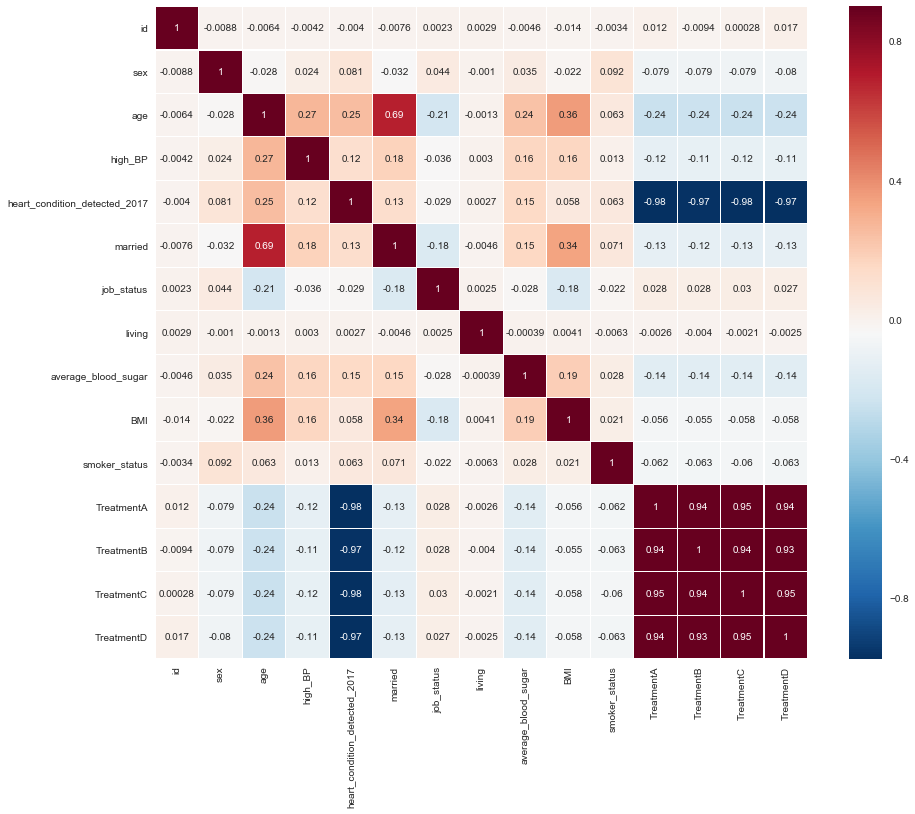

In [10]:
plt.subplots(figsize = (15,12))
sns.heatmap(data_total.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)

In [11]:
len(data_total[data_total['heart_condition_detected_2017'].isnull()])

58

In [12]:
len(data_total[data_total['sex'].isnull()])

47

In [13]:
len(data_total[data_total['age'].isnull()])

50

In [14]:
len(data_total[data_total['high_BP'].isnull()])

59

In [15]:
len(data_total[data_total['married'].isnull()])

18

In [16]:
len(data_total[data_total['job_status'].isnull()])

51

In [17]:
len(data_total[data_total['average_blood_sugar'].isnull()])

72

In [18]:
len(data_total[data_total['BMI'].isnull()])

1508

In [19]:
len(data_total[data_total['smoker_status'].isnull()])

13375

In [20]:
print(len(data_train))

34872


In [21]:
print(len(data_test))

8718


In [22]:
data_total['heart_condition_detected_2017'].value_counts()

0.0    41462
1.0     2070
Name: heart_condition_detected_2017, dtype: int64

In [23]:
data_train['age'][data_train['age'].isnull()].index

Int64Index([    5,    71,  2678,  2948,  3549,  3660,  4045,  4576,  5463,
             6162,  6700,  7102,  7477, 10125, 10669, 11687, 12802, 13254,
            13759, 14471, 14572, 15527, 15670, 17628, 18611, 22201, 22710,
            23086, 25375, 25683, 27331, 27489, 29249, 29698, 30170, 30631,
            31993, 33365, 33447, 34056],
           dtype='int64')

In [24]:
data_train_a = deepcopy(data_train)
data_test_a = deepcopy(data_test)


In [25]:
data_train_a['age'] = data_train_a['age'].fillna(data_total['age'].median())
data_test_a['age'] = data_test_a['age'].fillna(data_total['age'].median())

In [26]:
print(len(data_train_a))
print(len(data_test_a))

34872
8718


In [27]:
data_train_a['stroke_in_2018'].isnull().sum()

42

In [28]:
len(data_train_a['stroke_in_2018'][data_train_a['stroke_in_2018'].isnull()])

42

In [29]:
data_train_a = data_train_a.drop(data_train_a['stroke_in_2018'][data_train_a['stroke_in_2018'].isnull()].index)


In [30]:
del data_train_a['id']
del data_test_a['id']

In [31]:
del data_train_a['living']
del data_test_a['living']

In [32]:
data_train_a['job_status'] = data_train_a['job_status'].fillna(0)
data_test_a['job_status'] = data_test_a['job_status'].fillna(0)

In [33]:
data_train_a['BMI'] = data_train_a['BMI'].fillna(data_total['BMI'].mean())
data_test_a['BMI'] = data_test_a['BMI'].fillna(data_total['BMI'].mean())

In [34]:
data_train_a['average_blood_sugar'] = data_train_a['average_blood_sugar'].fillna(data_total['average_blood_sugar'].median())

data_test_a['average_blood_sugar'] = data_test_a['average_blood_sugar'].fillna(data_total['average_blood_sugar'].median())


In [35]:
data_train_a['heart_condition_detected_2017'] = data_train_a['heart_condition_detected_2017'].fillna(0)
data_test_a['heart_condition_detected_2017'] = data_test_a['heart_condition_detected_2017'].fillna(0)


In [36]:
data_train_a['high_BP'] = data_train_a['high_BP'].fillna(0)
data_test_a['high_BP'] = data_test_a['high_BP'].fillna(0)


In [37]:
data_train_a['smoker_status'] = data_train_a['smoker_status'].fillna(3)
data_test_a['smoker_status'] = data_test_a['high_BP'].fillna(3)

In [38]:
train_index = data_train_a['married'][data_train_a['married'].isnull()].index
test_index = data_test_a['married'][data_test_a['married'].isnull()].index

In [39]:
data_train_a['married'][train_index]=data_train_a['age'][train_index].apply(lambda x:0 if x<=30 else 1)

data_test_a['married'][test_index]=data_test_a['age'][test_index].apply(lambda x:0 if x<=30 else 1)



In [40]:
data_train_a['sex'] = data_train_a.fillna(0)
data_test_a['sex'] = data_test_a.fillna(0)

In [41]:
data_train_a['married'].isnull().sum()

0

In [42]:
data_test_a.isnull().sum()

sex                              0
age                              0
high_BP                          0
heart_condition_detected_2017    0
married                          0
job_status                       0
average_blood_sugar              0
BMI                              0
smoker_status                    0
TreatmentA                       0
TreatmentB                       0
TreatmentC                       0
TreatmentD                       0
dtype: int64

In [43]:
print(len(data_train_a))
print(len(data_test_a))

34830
8718


In [44]:
age = data_train_a['age']
bins = [0,10,20,40,60,80,100]
cats_age = pd.cut(age, bins, labels = [0,1,2,3,4,5])
average_blood_sugar = data_train_a['average_blood_sugar']
bins = [0,60,80,90,110,130,170,210,300]
cats_average_blood_sugar = pd.cut(average_blood_sugar, bins, labels = [0,1,2,3,4,5,6,7])
BMI = data_train_a['BMI']
bins = [0,22,27,33,40,100]
cats_BMI = pd.cut(BMI, bins,labels = [0,1,2,3,4])
data_train_a['cats_age'] = cats_age
data_train_a['cats_average_blood_sugar'] = cats_average_blood_sugar
data_train_a['cats_BMI'] = cats_BMI

In [45]:
age = data_test_a['age']
bins = [0,10,20,40,60,80,100]
cats_age = pd.cut(age, bins, labels = [0,1,2,3,4,5])
average_blood_sugar = data_test_a['average_blood_sugar']
bins = [0,60,80,90,110,130,170,210,300]
cats_average_blood_sugar = pd.cut(average_blood_sugar, bins, labels = [0,1,2,3,4,5,6,7])
BMI = data_test_a['BMI']
bins = [0,22,27,33,40,100]
cats_BMI = pd.cut(BMI, bins,labels = [0,1,2,3,4])
data_test_a['cats_age'] = cats_age
data_test_a['cats_average_blood_sugar'] = cats_average_blood_sugar
data_test_a['cats_BMI'] = cats_BMI

In [46]:
data_train_a['cats_age']=data_train_a['cats_age'].astype(float)
data_train_a['cats_average_blood_sugar']=data_train_a['cats_average_blood_sugar'].astype(float)
data_train_a['cats_BMI']=data_train_a['cats_BMI'].astype(float)

data_test_a['cats_age']=data_test_a['cats_age'].astype(float)
data_test_a['cats_average_blood_sugar']=data_test_a['cats_average_blood_sugar'].astype(float)
data_test_a['cats_BMI']=data_test_a['cats_BMI'].astype(float)


In [47]:
data_train_a.isnull().sum()

sex                              0
age                              0
high_BP                          0
heart_condition_detected_2017    0
married                          0
job_status                       0
average_blood_sugar              0
BMI                              0
smoker_status                    0
TreatmentA                       0
TreatmentB                       0
TreatmentC                       0
TreatmentD                       0
stroke_in_2018                   0
cats_age                         0
cats_average_blood_sugar         0
cats_BMI                         0
dtype: int64

In [48]:
avg_blood = data_train_a['average_blood_sugar']
lam_av = -1.29
data_train_a['average_blood_sugar'] = boxcox1p(data_train_a['average_blood_sugar'],lam_av)
data_test_a['average_blood_sugar'] = boxcox1p(data_test_a['average_blood_sugar'],lam_av)

In [49]:
bmi = data_train_a['BMI']
lam_bm = -0.076
# print(skew(boxcox1p(data_train_a['BMI'],lam_bm)))

data_train_a['BMI'] = boxcox1p(data_train_a['BMI'],lam_bm)

data_test_a['BMI'] = boxcox1p(data_test_a['BMI'],lam_bm)



In [50]:
l_age = data_train_a['age']
lam_age=1.12
# print(skew(boxcox1p(data_train_a['age'],lam_age)))

data_train_a['age'] = boxcox1p(data_train_a['age'],lam_age)
data_test_a['age'] = boxcox1p(data_test_a['age'],lam_age)


In [51]:
data_train_a['age'].isnull().sum()

0

In [52]:
data_train_a = data_train_a.drop_duplicates(keep='first')

# data_test_a = data_test_a.drop_duplicates(keep='first')
print(len(data_train_a))
print(len(data_test_a))

34751
8718


In [53]:
data_train_a.head()

,sex,age,high_BP,heart_condition_detected_2017,married,job_status,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018,cats_age,cats_average_blood_sugar,cats_BMI
0,0.0,89.943701,1.0,0.0,1.0,3.0,0.772116,3.170042,0.0,2.0,2.0,2.0,2.0,0.0,4.0,1.0,3.0
1,0.0,40.900482,0.0,0.0,0.0,0.0,0.773368,3.032318,1.0,2.0,2.0,2.0,2.0,0.0,2.0,3.0,2.0
2,0.0,73.701456,1.0,0.0,1.0,3.0,0.772361,3.273135,2.0,2.0,2.0,2.0,2.0,0.0,3.0,1.0,4.0
3,0.0,78.537806,0.0,0.0,1.0,3.0,0.773491,3.497484,1.0,2.0,2.0,2.0,2.0,0.0,3.0,4.0,4.0
4,1.0,36.397709,0.0,0.0,0.0,0.0,0.772056,2.935375,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0


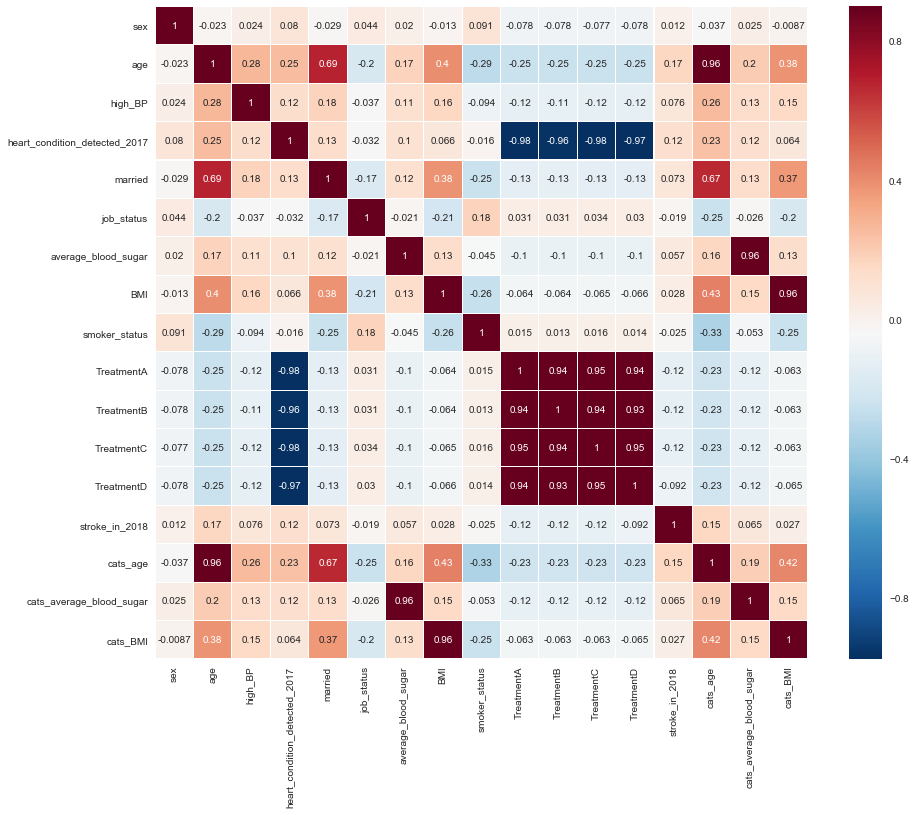

In [54]:
plt.subplots(figsize = (15,12))
sns.heatmap(data_train_a.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)

In [55]:
# job_s = data_train_a['job_status']

In [56]:
# job_s_d = pd.get_dummies(job_s)


In [57]:
# job_s_d

,0.0,1.0,2.0,3.0,4.0
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,0,1,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [58]:
data_train_a.to_csv('data_train_1.csv',index=False)
data_test_a.to_csv('data_test_1.csv',index=False)